In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [14]:
#Create a SQLite connection
conn = sqlite3.connect('ReportAufrufe.sqlite')

# Load data from the 'my_table' table into a Pandas DataFrame
df = pd.read_sql_query('SELECT * FROM ReportAufrufe', conn)
print(df.head())
# Close the SQLite connection
conn.close()
df

                    TimeStamp  Type State  Seconds ErrorCode ErrorMessage  \
0  2023-03-14 11:49:07.896000   rep    ok  0.00258         0           ""   
1  2023-03-14 11:49:08.761000   rep    ok  0.00207         0           ""   
2  2023-03-14 11:49:08.807000   rep    ok  0.00227         0           ""   
3  2023-03-14 11:49:08.889000   rep    ok  0.00486         0           ""   
4  2023-03-14 11:49:08.974000   rep    ok  0.00961         0           ""   

  Application Scope Mandant                           User  \
0      "ABAV"    ""    8370                    "adde[234]"   
1      "ABAV"    ""    8370                    "adde[234]"   
2      "ABAV"    ""    8370                    "kaaf[192]"   
3      "ABAV"    ""    8370                    "adde[234]"   
4      "ABAV"    ""    8370   "sa_abacus_prozessuser[102]"   

                                                Pfad  \
0   "D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...   
1   "D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...

,TimeStamp,Type,State,Seconds,ErrorCode,ErrorMessage,Application,Scope,Mandant,User,Pfad,Report,SubReportTables,SubReportFields,Tables,Finds
0,2023-03-14 11:49:07.896000,rep,ok,0.00258,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",1,0,3,5
1,2023-03-14 11:49:08.761000,rep,ok,0.00207,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",1,0,3,7
2,2023-03-14 11:49:08.807000,rep,ok,0.00227,0,"""""","""ABAV""","""""",8370,"""kaaf[192]""","""D:\Abacus\abac\kd\abav\Prozesse\SCCM\SCMM_AB...","""D:\Abacus\abac\kd\abav\Prozesse\SCCM\SCMM_AB...",1,0,8,15
3,2023-03-14 11:49:08.889000,rep,ok,0.00486,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",2,0,4,9
4,2023-03-14 11:49:08.974000,rep,ok,0.00961,0,"""""","""ABAV""","""""",8370,"""sa_abacus_prozessuser[102]""","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...",0,0,1,2
5,2023-03-14 11:49:09.197000,rep,ok,0.0045,0,"""""","""ABAV""","""""",8370,"""sa_abacus_prozessuser[102]""","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...",0,0,1,2
6,2023-03-14 11:49:09.284000,rep,ok,5.28399,0,"""""","""ABAV""","""""",8370,"""sa_abacus_projektschnittstelle[47]""","""D:\Abacus\abac\kd\abav\web\ProjektnummerObje...","""D:\Abacus\abac\kd\abav\web\ProjektnummerObje...",0,0,1,2
7,2023-03-14 11:49:10.074000,rep,ok,0.00126,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\Verkauf\rel...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\Verkauf\rel...",0,0,7,6
8,2023-03-14 11:49:11.016000,rep,ok,0.00608,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",0,0,5,6
9,2023-03-14 11:49:11.134000,rep,ok,0.00277,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",1,0,6,8


In [15]:
counts = df['Report'].value_counts().nlargest(10)

In [16]:
counts

 "D:\Abacus\abac\kd\abav\HEAG\PPS\PPS_ODR_Referenz.avx"                                                  4
 "D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OPTIBRICK_AKTUALISIERUNG_SQLITE_APPEND.avw"                  2
 "D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositionenErstellen\AVOR_Positionen_loeschen.avw"                 1
 "D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositionenErstellen\_v1_AVOR_Positionen_erstellen.avx"            1
 "D:\Abacus\abac\kd\abav\Prozesse\SCCM\SCMM_ABL AuftragsposKlassierungZuordnen\Datenaufbereitung.avw"    1
 "D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositionenErstellen\AVOR_Positionen_erstellen.avw"                1
 "D:\Abacus\abac\kd\abav\web\ProjektnummerObjektnummer.avx"                                              1
 "D:\Abacus\abac\kd\abav\HEAG\ABEA\Verkauf\reloadPositionTextFromADO.avx"                                1
 "D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositionenErstellen\_v1_AVOR_Positionen_Ref_schreiben.avx"        1
 "D:\Abacus\abac\kd\abav\HEAG\ABEA\AV

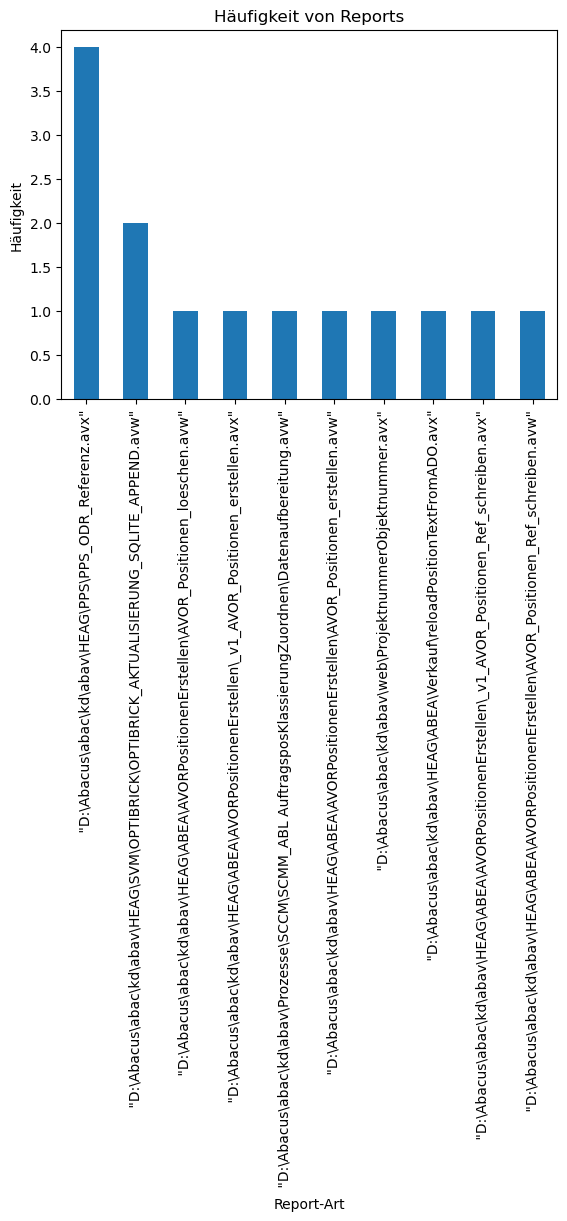

In [17]:
# Erstelle ein Balkendiagramm
ax = counts.plot(kind='bar')

# Füge Titel und Achsenbeschriftungen hinzu
ax.set_title('Häufigkeit von Reports')
ax.set_xlabel('Report-Art')
ax.set_ylabel('Häufigkeit')

# Zeige das Diagramm an
plt.show()

In [18]:
df

,TimeStamp,Type,State,Seconds,ErrorCode,ErrorMessage,Application,Scope,Mandant,User,Pfad,Report,SubReportTables,SubReportFields,Tables,Finds
0,2023-03-14 11:49:07.896000,rep,ok,0.00258,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",1,0,3,5
1,2023-03-14 11:49:08.761000,rep,ok,0.00207,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",1,0,3,7
2,2023-03-14 11:49:08.807000,rep,ok,0.00227,0,"""""","""ABAV""","""""",8370,"""kaaf[192]""","""D:\Abacus\abac\kd\abav\Prozesse\SCCM\SCMM_AB...","""D:\Abacus\abac\kd\abav\Prozesse\SCCM\SCMM_AB...",1,0,8,15
3,2023-03-14 11:49:08.889000,rep,ok,0.00486,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",2,0,4,9
4,2023-03-14 11:49:08.974000,rep,ok,0.00961,0,"""""","""ABAV""","""""",8370,"""sa_abacus_prozessuser[102]""","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...",0,0,1,2
5,2023-03-14 11:49:09.197000,rep,ok,0.0045,0,"""""","""ABAV""","""""",8370,"""sa_abacus_prozessuser[102]""","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...","""D:\Abacus\abac\kd\abav\HEAG\SVM\OPTIBRICK\OP...",0,0,1,2
6,2023-03-14 11:49:09.284000,rep,ok,5.28399,0,"""""","""ABAV""","""""",8370,"""sa_abacus_projektschnittstelle[47]""","""D:\Abacus\abac\kd\abav\web\ProjektnummerObje...","""D:\Abacus\abac\kd\abav\web\ProjektnummerObje...",0,0,1,2
7,2023-03-14 11:49:10.074000,rep,ok,0.00126,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\Verkauf\rel...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\Verkauf\rel...",0,0,7,6
8,2023-03-14 11:49:11.016000,rep,ok,0.00608,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",0,0,5,6
9,2023-03-14 11:49:11.134000,rep,ok,0.00277,0,"""""","""ABAV""","""""",8370,"""adde[234]""","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...","""D:\Abacus\abac\kd\abav\HEAG\ABEA\AVORPositio...",1,0,6,8


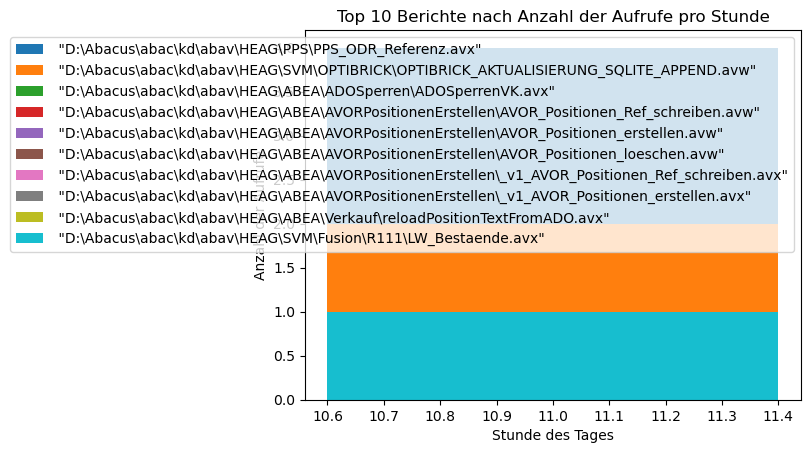

In [19]:
# Datum konvertieren
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Gruppieren nach Report und Stunden und zählen
df_grouped = df.groupby([df['Report'], df['TimeStamp'].dt.hour]).size().reset_index(name='count')

# Top 10 Berichte auswählen
top_10_reports = df_grouped.groupby('Report').sum().nlargest(10, 'count').index.values

# Filtern für Top 10 Berichte
df_top_10 = df_grouped[df_grouped['Report'].isin(top_10_reports)]

# Schleife für jeden Bericht, um Plot zu erstellen
for report in top_10_reports:
    df_report = df_top_10[df_top_10['Report'] == report]
    plt.bar(df_report['TimeStamp'], df_report['count'], label=report)

# Plot-Eigenschaften
plt.title('Top 10 Berichte nach Anzahl der Aufrufe pro Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Aufrufe')
plt.legend()
plt.show()